# Generating with a trained GAN

In this notebook we will perform some basic tasks with generating images from our pretrained GAN. By default this notebook will load in the GAN model pretrained for 1000 epochs on MNIST, but feel free to load in your own trained model that you have trained in `gan-training.ipynb`. 

After working through this GAN notebook have a go at running the python script `interactive-gan-generation.py` to see how we can use human controlled inputs for controlling image generation. 

First lets do some imports:

In [1]:
%matplotlib inline

import torch

import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML
from PIL import Image

from src.util import slerp
from src.gan_model import Generator

#### Hyperparameters

In [69]:
# Training and model hyper-parameters
device = 'cpu'
image_size = 32 # Image resolution for training
num_channels = 3 # Number of channels in the iamge
z_dim = 100 # Size of latent dimension
n_f_maps = 32 # Number of convolutional feature maps in model
load_path = 'gan_weights15.pt'

#### Instantiate generator model

Here we instantiate our generator model. We have to set our model to `.eval()` because we used batch norm in training which needs to be turned off when we are generating samples with a batch size of 1. 

In [70]:
generator = Generator(z_dim,n_f_maps,num_channels)

checkpoint_sd = torch.load(load_path, map_location=torch.device('cpu'))
generator.load_state_dict(checkpoint_sd['generator'])

generator.eval()

Generator(
  (conv1): ConvTranspose2d(100, 128, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (conv2): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (conv3): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (conv4): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

#### Generate random image

Here we are create a random latent vector and generating a random image. You can run this cell multiple times to see how different generated images.

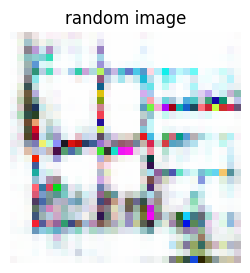

In [71]:
with torch.no_grad():
    random_latent = torch.randn(1, z_dim, 1, 1, device=device)
    image_tensor = generator(random_latent)
    image = transforms.functional.to_pil_image(image_tensor.squeeze(0))
    
    plt.figure(figsize=(3,3))
    plt.axis("off")
    plt.title("random image")
    plt.imshow(image)

### Performing arithmetic on latent variables

The first set of tasks is to perform arithemetic with latent variables. Our latent variables are just vectors, and we can perform basic arithmetic like addition, subtraction and multiplication on them. Here we will make two latent vectors, latent_a and latent_b and use those to generate our images. 

As we are generating them randomly, you can re-run the cell a couple of times until you get images you are happy with:

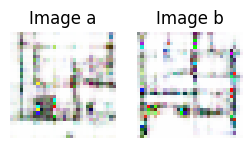

In [109]:
with torch.no_grad():
    latent_a = torch.randn(1, z_dim, 1, 1, device=device)
    im_tensor_a = generator(latent_a)
    image_a = transforms.functional.to_pil_image(im_tensor_a.squeeze(0))

    latent_b = torch.randn(1, z_dim, 1, 1, device=device)
    im_tensor_b = generator(latent_b)
    image_b = transforms.functional.to_pil_image(im_tensor_b.squeeze(0))

plt.figure(figsize=(3,6))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Image a")
plt.imshow(image_a)

plt.subplot(1,2,2)
plt.axis("off")
plt.title("Image b")
plt.imshow(image_b)

#### Addition

Creat a new latent variable named `latent_a_plus_b` by summing together the two latent variables `latent_a` and `latent_b`. 

Then with the following code use that latent variable to generate a new image, shown side by side with images A&B with the following code:

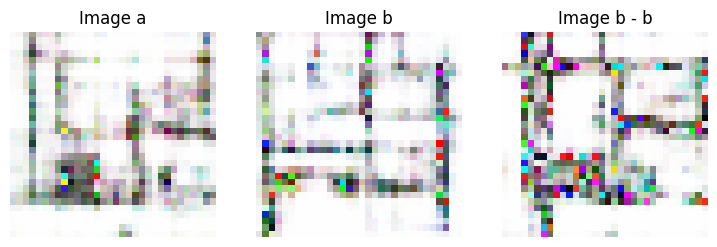

In [110]:
latent_a_plus_a =  latent_a + latent_b * latent_a
im_tensor_a_plus_a = generator(latent_a_plus_a)
im_a_plus_a = transforms.functional.to_pil_image(im_tensor_a_plus_a.squeeze(0))

plt.figure(figsize=(9,9))
plt.subplot(1,3,1)
plt.axis("off")
plt.title("Image a")
plt.imshow(image_a)

plt.subplot(1,3,2)
plt.axis("off")
plt.title("Image b")
plt.imshow(image_b)

plt.subplot(1,3,3)
plt.axis("off")
plt.title("Image b - b")
plt.imshow(im_a_plus_a)

#### Subtraction

Now, based on the code you developed in the previous cell, can you add code in here to create the images subtracting b from a and then subtracting a from b in the two following cells:

h:\Miniconda\envs\nlp\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


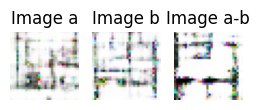

In [113]:
latent_a_minus_b = latent_b - latent_a
im_tensor_a_minus_b = generator(latent_a_minus_b)
im_a_minus_b = transforms.functional.to_pil_image(im_tensor_a_minus_b.squeeze(0))

plt.figure(figsize=(3,9))
plt.subplot(1,3,1)
plt.axis("off")
plt.title("Image a")
plt.imshow(image_a)

plt.subplot(1,3,2)
plt.axis("off")
plt.title("Image b")
plt.imshow(image_b)

plt.subplot(1,3,3)
plt.axis("off")
plt.title("Image a-b")
plt.imshow(im_a_minus_b)

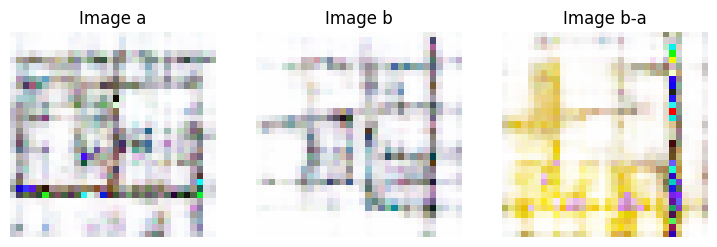

In [8]:
latent_b_minus_a = latent_b - latent_a
im_tensor_b_minus_a = generator(latent_b_minus_a)
im_b_minus_a = transforms.functional.to_pil_image(im_tensor_b_minus_a.squeeze(0))

plt.figure(figsize=(9,9))
plt.subplot(1,3,1)
plt.axis("off")
plt.title("Image a")
plt.imshow(image_a)

plt.subplot(1,3,2)
plt.axis("off")
plt.title("Image b")
plt.imshow(image_b)

plt.subplot(1,3,3)
plt.axis("off")
plt.title("Image b-a")
plt.imshow(im_b_minus_a)

#### Multiplication

Finally, can you create an image by multiplying a with b?

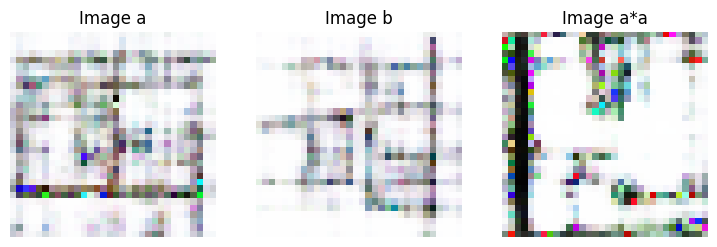

In [9]:
latent_a_times_b = latent_a * latent_b
im_tensor_a_times_b = generator(latent_a_times_b)
im_a_times_b = transforms.functional.to_pil_image(im_tensor_a_times_b.squeeze(0))

plt.figure(figsize=(9,9))
plt.subplot(1,3,1)
plt.axis("off")
plt.title("Image a")
plt.imshow(image_a)

plt.subplot(1,3,2)
plt.axis("off")
plt.title("Image b")
plt.imshow(image_b)

plt.subplot(1,3,3)
plt.axis("off")
plt.title("Image a*b")
plt.imshow(im_a_times_b)

### Latent interpolation

Here we will interpolate between our two latent variables. We need to convert them into numpy and remove the empty dimension taking it from shape `(1,100,1,1)` (which the GAN expects) to just `(100,)`. This is why we need to do function calls `squeeze` and `unsqueeze`.

Walk through the next code cell to see how we can use interpolation to create a smooth animation between our two latent variables. We will be using the `slerp` (spherical latent interpolation) function in `src/util.py`. 

In [10]:
# Number of samples we take between two points
num_interp = 100
# Create a list of numbers between 1/100 and 1 of equal step
interp_vals = np.linspace(1./num_interp, 1, num=num_interp)
# Convert latent vectors to numpy arrays
latent_a_np = latent_a.cpu().numpy().squeeze()
latent_b_np = latent_b.cpu().numpy().squeeze()
# Create our spherical interpolation between two points
latent_interp = np.array([slerp(v, latent_a_np, latent_b_np) for v in interp_vals],
                                dtype=np.float32)

# Array for images to save to for visualisation
img_list = []

# For each latent vector in our interpolation
for latent in latent_interp:
    # Convert to torch tensor
    latent = torch.tensor(latent)
    # Reshape tensor to (1,100,1,1)
    latent = latent.unsqueeze(0).unsqueeze(2).unsqueeze(3).to(device)
    # Generate image from latent
    image_tensor = generator(latent)
    # Convert to PIL Image
    image = transforms.functional.to_pil_image(image_tensor.cpu().squeeze(0))
    # Add to image array
    img_list.append(image)

Now lets visualisation our latent space interpolation:

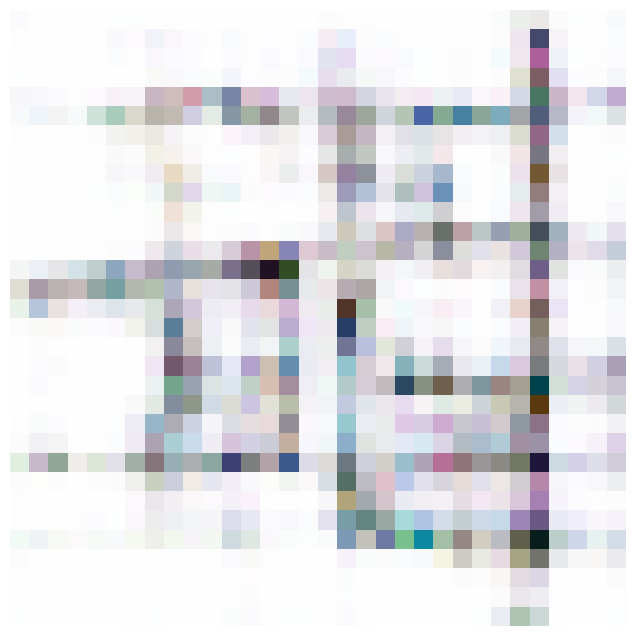

In [11]:
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(i, animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

#### Interpolation tasks

See if you can edit to cell with the latent space interpolation code to do the follow:

**A:** Can you interpolate from B to A rather than A to B?

**B:** Can you interpolate from A to B then back to A? To create a smooth looping animation. (Tip, [you can use the function np.vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) to concatonate two numpy arrays).

**C:** Can you interpolate from A to A+B to B? What about interpolating between any of the other latent variables here?

## Task-A solution

h:\Miniconda\envs\nlp\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


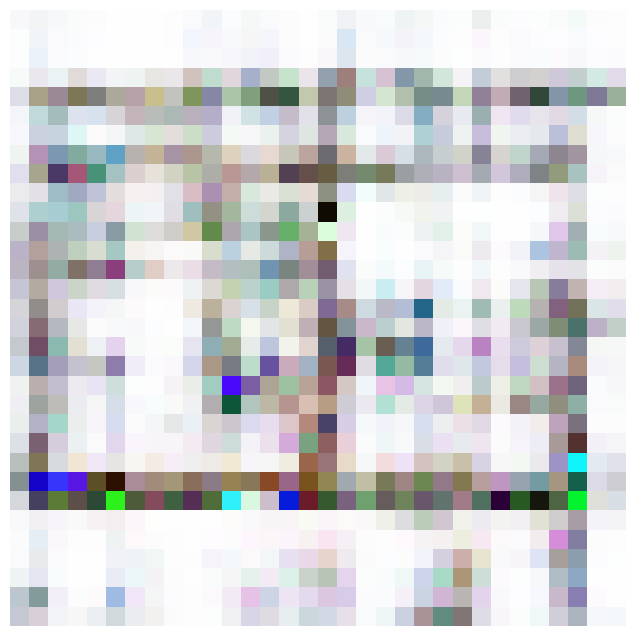

In [12]:
# Number of samples we take between two points
num_interp = 100
# Create a list of numbers between 1/100 and 1 of equal step
interp_vals = np.linspace(1./num_interp, 1, num=num_interp)
# Convert latent vectors to numpy arrays
latent_a_np = latent_a.cpu().numpy().squeeze()
latent_b_np = latent_b.cpu().numpy().squeeze()
# Create our spherical interpolation between two points
latent_interp = np.array([slerp(v, latent_b_np, latent_a_np) for v in interp_vals],
                                dtype=np.float32)

# Array for images to save to for visualisation
img_list = []

# For each latent vector in our interpolation
for latent in latent_interp:
    # Convert to torch tensor
    latent = torch.tensor(latent)
    # Reshape tensor to (1,100,1,1)
    latent = latent.unsqueeze(0).unsqueeze(2).unsqueeze(3).to(device)
    # Generate image from latent
    image_tensor = generator(latent)
    # Convert to PIL Image
    image = transforms.functional.to_pil_image(image_tensor.cpu().squeeze(0))
    # Add to image array
    img_list.append(image)

fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(i, animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

## Task B solution

h:\Miniconda\envs\nlp\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


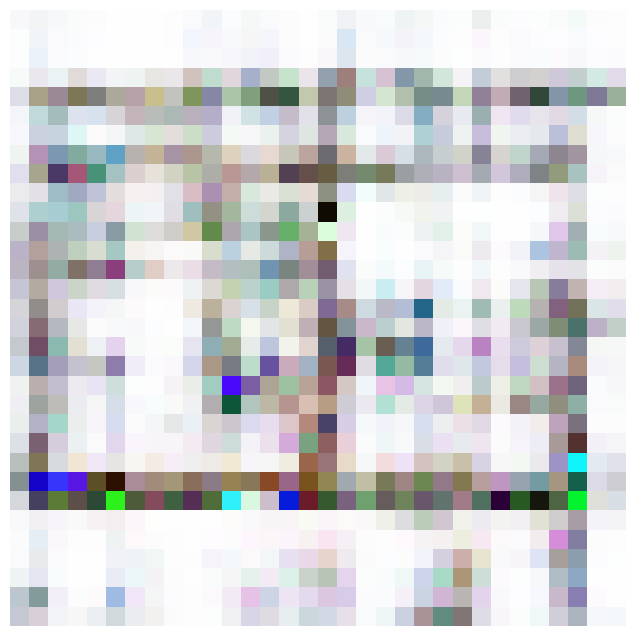

In [13]:
# Number of samples we take between two points
num_interp = 100
# Create a list of numbers between 1/100 and 1 of equal step
interp_vals = np.linspace(1./num_interp, 1, num=num_interp)
# Convert latent vectors to numpy arrays
latent_a_np = latent_a.cpu().numpy().squeeze()
latent_b_np = latent_b.cpu().numpy().squeeze()
# Create our spherical interpolation between two points
latent_interp_1 = np.array([slerp(v, latent_a_np, latent_b_np) for v in interp_vals],
                                dtype=np.float32)

latent_interp_2 = np.array([slerp(v, latent_b_np, latent_a_np) for v in interp_vals],
                                dtype=np.float32)

full_latent_interp = np.vstack((latent_interp_1, latent_interp_2))

# Array for images to save to for visualisation
img_list = []

# For each latent vector in our interpolation
for latent in full_latent_interp:
    # Convert to torch tensor
    latent = torch.tensor(latent)
    # Reshape tensor to (1,100,1,1)
    latent = latent.unsqueeze(0).unsqueeze(2).unsqueeze(3).to(device)
    # Generate image from latent
    image_tensor = generator(latent)
    # Convert to PIL Image
    image = transforms.functional.to_pil_image(image_tensor.cpu().squeeze(0))
    # Add to image array
    img_list.append(image)

fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(i, animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

## Task C solution

h:\Miniconda\envs\nlp\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


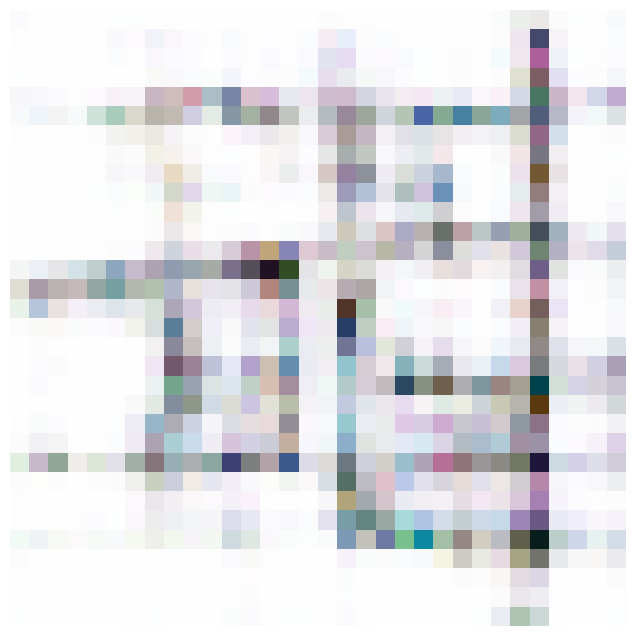

In [14]:
# Number of samples we take between two points
num_interp = 100
# Create a list of numbers between 1/100 and 1 of equal step
interp_vals = np.linspace(1./num_interp, 1, num=num_interp)
# Convert latent vectors to numpy arrays
latent_a_np = latent_a.cpu().numpy().squeeze()
latent_b_np = latent_b.cpu().numpy().squeeze()
latent_a_plus_b_np = latent_a_np + latent_b_np
# Create our spherical interpolation between two points
latent_interp_1 = np.array([slerp(v, latent_a_np, latent_a_plus_b_np) for v in interp_vals],
                                dtype=np.float32)

latent_interp_2 = np.array([slerp(v, latent_a_plus_b_np, latent_b_np) for v in interp_vals],
                                dtype=np.float32)

full_latent_interp = np.vstack((latent_interp_1, latent_interp_2))

# Array for images to save to for visualisation
img_list = []

# For each latent vector in our interpolation
for latent in full_latent_interp:
    # Convert to torch tensor
    latent = torch.tensor(latent)
    # Reshape tensor to (1,100,1,1)
    latent = latent.unsqueeze(0).unsqueeze(2).unsqueeze(3).to(device)
    # Generate image from latent
    image_tensor = generator(latent)
    # Convert to PIL Image
    image = transforms.functional.to_pil_image(image_tensor.cpu().squeeze(0))
    # Add to image array
    img_list.append(image)

fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(i, animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())